In [1]:
import pandas as pd


# Binary Label

In [7]:
df = pd.read_json("results_20_binary_take2.json")
df.head()

,fscore,recall,precision,overall_fscore,overall_recall,overall_precision,positive_annotated,negative_annotated
0,1.0,1.0,1.0,0.084821,0.0475,0.395833,1,0
1,1.0,1.0,1.0,0.559211,0.4250,0.817308,2,0
2,1.0,1.0,1.0,0.792261,0.9725,0.668385,2,1
3,1.0,1.0,1.0,0.792261,0.9725,0.668385,3,1
4,1.0,1.0,1.0,0.648508,0.6250,0.673854,3,2


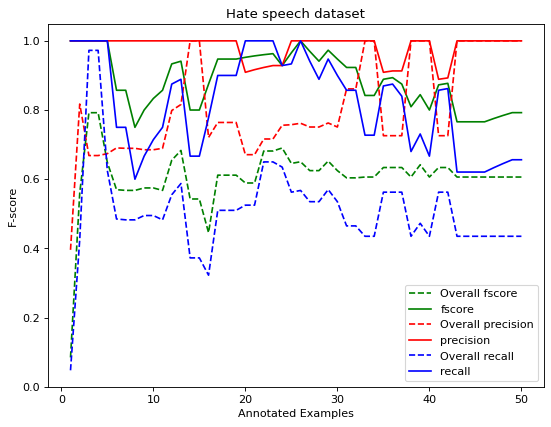

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df["positive_annotated"]+df["negative_annotated"], df["overall_fscore"],"g--", label="Overall fscore")

plt.plot(df["positive_annotated"]+df["negative_annotated"], df["fscore"], "g-",label="fscore")


plt.plot(df["positive_annotated"]+df["negative_annotated"], df["overall_precision"],"r--", label="Overall precision")

plt.plot(df["positive_annotated"]+df["negative_annotated"], df["precision"], "r-",label="precision")


plt.plot(df["positive_annotated"]+df["negative_annotated"], df["overall_recall"],"b--", label="Overall recall")

plt.plot(df["positive_annotated"]+df["negative_annotated"], df["recall"], "b-",label="recall")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset")
plt.legend()
plt.show()

# Multiclass Labels

In [1]:
import pandas as pd
df = pd.read_json("results_random_labeling_feature_selection_may24.json")
df = df.fillna(0)
df.tail(10)

,offensive,hate,none,offensive_count,hate_count,none_count
5,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",10,13,7
6,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.9473684210526311, 'recall': 1.0, ...",13,13,9
7,"{'fscore': 0.962962962962963, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",14,15,11
8,"{'fscore': 0.96551724137931, 'recall': 1.0, 'p...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.923076923076923, 'recall': 1.0, '...",15,18,12
9,"{'fscore': 0.96551724137931, 'recall': 1.0, 'p...","{'fscore': 0.9743589743589741, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",16,19,15
10,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.954545454545454, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",17,21,17
11,"{'fscore': 0.9714285714285711, 'recall': 1.0, ...","{'fscore': 0.9777777777777771, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",19,23,18
12,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.972972972972973, 'recall': 1.0, '...",22,25,18
13,"{'fscore': 0.9777777777777771, 'recall': 1.0, ...","{'fscore': 0.9615384615384611, 'recall': 1.0, ...","{'fscore': 0.9756097560975611, 'recall': 1.0, ...",24,26,20
14,"{'fscore': 0.9777777777777771, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.9795918367346931, 'recall': 1.0, ...",24,27,24


In [2]:
def get_stuff(x, name):
    if x==0:
        return 0.0
    else:
        try:
            return x[name]
        except:
            print(type(x))

In [3]:
# themes = ["price", "service", "environment"]
themes = ["offensive", "hate", "none"]
metrices = ["fscore", "recall", "precision"]
for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

In [4]:
df.tail(10)

,offensive,hate,none,offensive_count,hate_count,none_count,offensive_fscore,offensive_overall_fscore,offensive_recall,offensive_overall_recall,...,hate_recall,hate_overall_recall,hate_precision,hate_overall_precision,none_fscore,none_overall_fscore,none_recall,none_overall_recall,none_precision,none_overall_precision
5,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",10,13,7,1.000000,0.518962,1.0,0.650,...,1.0,0.365,1.000000,0.517730,1.000000,0.289157,1.0,0.240,1.000000,0.363636
6,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.9473684210526311, 'recall': 1.0, ...",13,13,9,1.000000,0.274286,1.0,0.240,...,1.0,0.580,1.000000,0.322222,0.947368,0.431193,1.0,0.470,0.900000,0.398305
7,"{'fscore': 0.962962962962963, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",14,15,11,0.962963,0.317708,1.0,0.305,...,1.0,0.485,1.000000,0.370229,1.000000,0.488372,1.0,0.630,1.000000,0.398734
8,"{'fscore': 0.96551724137931, 'recall': 1.0, 'p...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.923076923076923, 'recall': 1.0, '...",15,18,12,0.965517,0.269795,1.0,0.230,...,1.0,0.255,1.000000,0.500000,0.923077,0.473282,1.0,0.620,0.857143,0.382716
9,"{'fscore': 0.96551724137931, 'recall': 1.0, 'p...","{'fscore': 0.9743589743589741, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",16,19,15,0.965517,0.227758,1.0,0.160,...,1.0,0.275,0.950000,0.419847,1.000000,0.489237,1.0,0.625,1.000000,0.401929
10,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.954545454545454, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",17,21,17,1.000000,0.285714,1.0,0.265,...,1.0,0.455,0.913043,0.356863,1.000000,0.414847,1.0,0.475,1.000000,0.368217
11,"{'fscore': 0.9714285714285711, 'recall': 1.0, ...","{'fscore': 0.9777777777777771, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",19,23,18,0.971429,0.384181,1.0,0.340,...,1.0,0.145,0.956522,0.537037,1.000000,0.300885,1.0,0.255,1.000000,0.366906
12,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.972972972972973, 'recall': 1.0, '...",22,25,18,1.000000,0.324841,1.0,0.255,...,1.0,0.370,1.000000,0.323144,0.972973,0.290698,1.0,0.250,0.947368,0.347222
13,"{'fscore': 0.9777777777777771, 'recall': 1.0, ...","{'fscore': 0.9615384615384611, 'recall': 1.0, ...","{'fscore': 0.9756097560975611, 'recall': 1.0, ...",24,26,20,0.977778,0.320513,1.0,0.250,...,1.0,0.195,0.925926,0.317073,0.975610,0.410023,1.0,0.450,0.952381,0.376569
14,"{'fscore': 0.9777777777777771, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.9795918367346931, 'recall': 1.0, ...",24,27,24,0.977778,0.416309,1.0,0.485,...,1.0,0.225,1.000000,0.316901,0.979592,0.380048,1.0,0.400,0.960000,0.361991


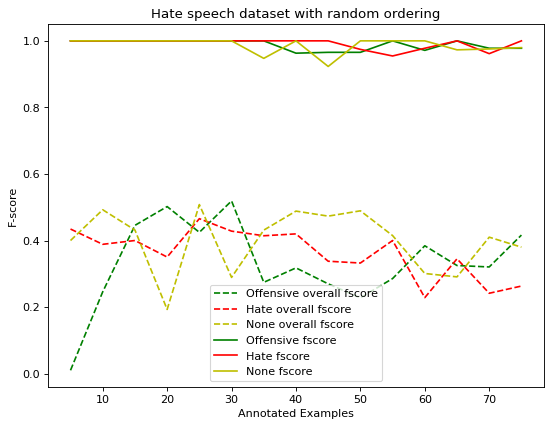

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x = df["offensive_count"] + df["hate_count"] + df["none_count"]
plt.plot(x, df["offensive_overall_fscore"],"g--", label="Offensive overall fscore")

plt.plot(x, df["hate_overall_fscore"], "r--", label="Hate overall fscore")

plt.plot(x, df["none_overall_fscore"], "y--", label="None overall fscore")

plt.plot(x, df["offensive_fscore"], "g-",label="Offensive fscore")

plt.plot(x, df["hate_fscore"],"r-", label="Hate fscore")


plt.plot(x, df["none_fscore"], "y-", label="None fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset with random ordering")
plt.legend()
plt.show()

In [6]:
df["offensive_patterns"] = df["offensive"].apply(lambda x: )

0     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
1     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
2     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
3     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
4     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
5     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
6     {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
7     {'fscore': 0.962962962962963, 'recall': 1.0, '...
8     {'fscore': 0.96551724137931, 'recall': 1.0, 'p...
9     {'fscore': 0.96551724137931, 'recall': 1.0, 'p...
10    {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
11    {'fscore': 0.9714285714285711, 'recall': 1.0, ...
12    {'fscore': 1.0, 'recall': 1.0, 'precision': 1....
13    {'fscore': 0.9777777777777771, 'recall': 1.0, ...
14    {'fscore': 0.9777777777777771, 'recall': 1.0, ...
Name: offensive, dtype: object

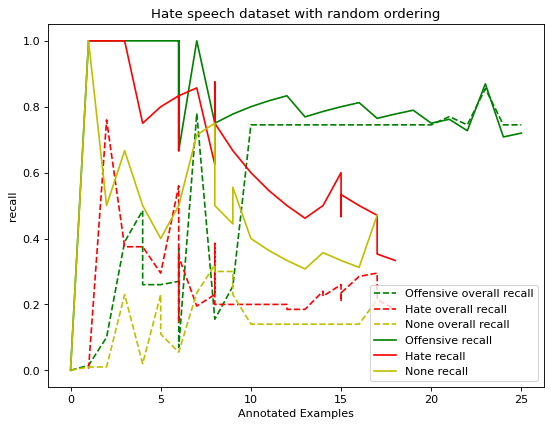

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)



plt.plot(df["offensive_count"], df["offensive_overall_recall"],"g--", label="Offensive overall recall")

plt.plot(df["hate_count"], df["hate_overall_recall"], "r--", label="Hate overall recall")

plt.plot(df["none_count"], df["none_overall_recall"], "y--", label="None overall recall")

plt.plot(df["offensive_count"], df["offensive_recall"], "g-",label="Offensive recall")

plt.plot(df["hate_count"], df["hate_recall"],"r-", label="Hate recall")


plt.plot(df["none_count"], df["none_recall"], "y-", label="None recall")

plt.xlabel("Annotated Examples")
plt.ylabel("recall")
plt.title("Hate speech dataset with random ordering")
plt.legend()
plt.show()

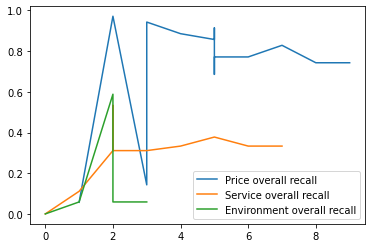

In [13]:
import matplotlib.pyplot as plt
plt.plot(df["price_count"], df["price_overall_recall"], label="Price overall recall")

plt.plot(df["service_count"], df["service_overall_recall"], label="Service overall recall")


plt.plot(df["environment_count"], df["environment_overall_recall"], label="Environment overall recall")

plt.legend()
plt.show()

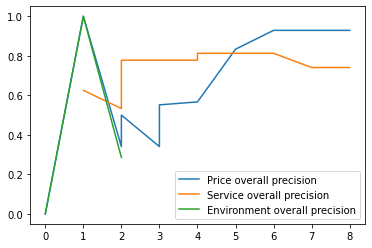

In [10]:
import matplotlib.pyplot as plt
plt.plot(df["price_count"], df["price_overall_precision"], label="Price overall precision")

plt.plot(df["service_count"], df["service_overall_precision"], label="Service overall precision")


plt.plot(df["environment_count"], df["environment_overall_precision"], label="Environment overall precision")

plt.legend()
plt.show()

# Random ordering in batches

In [1]:

import pandas as pd
df = pd.read_json("results_random_labeling_ordering.json")
df = df.fillna(0)
df.tail(10)

,offensive,hate,none,offensive_count,hate_count,none_count
15,"{'fscore': 0.6818181818181811, 'recall': 0.652...","{'fscore': 0.5714285714285711, 'recall': 0.428...","{'fscore': 0.6666666666666661, 'recall': 0.576...",23,30,27
16,"{'fscore': 0.73469387755102, 'recall': 0.72, '...","{'fscore': 0.5714285714285711, 'recall': 0.428...","{'fscore': 0.6666666666666661, 'recall': 0.535...",25,31,29
17,"{'fscore': 0.74074074074074, 'recall': 0.71428...","{'fscore': 0.5714285714285711, 'recall': 0.428...","{'fscore': 0.6530612244897961, 'recall': 0.533...",28,31,31
18,"{'fscore': 0.766666666666666, 'recall': 0.7419...","{'fscore': 0.55813953488372, 'recall': 0.41379...","{'fscore': 0.5454545454545451, 'recall': 0.387...",31,32,32
19,"{'fscore': 0.7878787878787881, 'recall': 0.764...","{'fscore': 0.5777777777777771, 'recall': 0.433...","{'fscore': 0.641509433962264, 'recall': 0.5312...",34,33,33
20,"{'fscore': 0.7826086956521731, 'recall': 0.75,...","{'fscore': 0.5777777777777771, 'recall': 0.433...","{'fscore': 0.641509433962264, 'recall': 0.5312...",38,34,33
21,"{'fscore': 0.788732394366197, 'recall': 0.7567...","{'fscore': 0.583333333333333, 'recall': 0.4375...","{'fscore': 0.59375, 'recall': 0.55882352941176...",39,36,35
22,"{'fscore': 0.7837837837837831, 'recall': 0.763...","{'fscore': 0.583333333333333, 'recall': 0.4375...","{'fscore': 0.538461538461538, 'recall': 0.3888...",40,36,39
23,"{'fscore': 0.7894736842105261, 'recall': 0.769...","{'fscore': 0.559999999999999, 'recall': 0.4242...","{'fscore': 0.538461538461538, 'recall': 0.3888...",43,38,39
24,"{'fscore': 0.7848101265822781, 'recall': 0.756...","{'fscore': 0.5, 'recall': 0.342857142857142, '...","{'fscore': 0.528301886792452, 'recall': 0.3783...",45,40,40


In [4]:
# themes = ["price", "service", "environment"]
themes = ["offensive", "hate", "none"]
metrices = ["fscore", "recall", "precision"]
for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

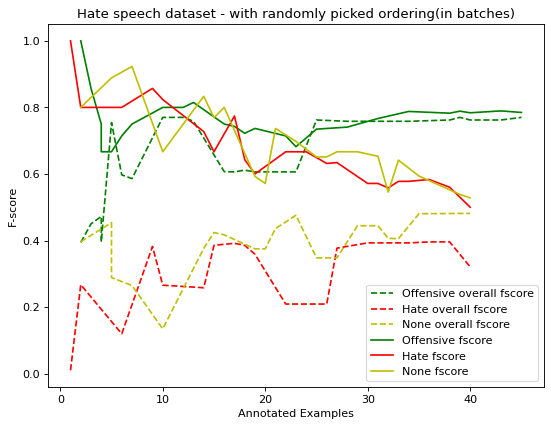

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df["offensive_count"], df["offensive_overall_fscore"],"g--", label="Offensive overall fscore")

plt.plot(df["hate_count"], df["hate_overall_fscore"], "r--", label="Hate overall fscore")

plt.plot(df["none_count"], df["none_overall_fscore"], "y--", label="None overall fscore")

plt.plot(df["offensive_count"], df["offensive_fscore"], "g-",label="Offensive fscore")

plt.plot(df["hate_count"], df["hate_fscore"],"r-", label="Hate fscore")


plt.plot(df["none_count"], df["none_fscore"], "y-", label="None fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset - with randomly picked ordering(in batches)")
plt.legend()
plt.show()

# Model Picked ordering

In [9]:
import pandas as pd
df = pd.read_json("results_labeling_ordering.json")
df = df.fillna(0)
df.tail(10)

,offensive,hate,none,offensive_count,hate_count,none_count
10,"{'fscore': 0.7213114754098361, 'recall': 0.814...","{'fscore': 0.5714285714285711, 'recall': 0.457...","{'fscore': 0.7636363636363631, 'recall': 0.656...",43,60,52
11,"{'fscore': 0.7096774193548381, 'recall': 0.785...","{'fscore': 0.561403508771929, 'recall': 0.4444...","{'fscore': 0.566037735849056, 'recall': 0.4285...",44,68,58
12,"{'fscore': 0.7096774193548381, 'recall': 0.758...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",46,77,62
13,"{'fscore': 0.7096774193548381, 'recall': 0.758...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",52,84,64
14,"{'fscore': 0.7076923076923071, 'recall': 0.793...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",58,91,66
15,"{'fscore': 0.7096774193548381, 'recall': 0.758...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",62,100,68
16,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",69,106,70
17,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",73,111,76
18,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",77,116,82
19,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",81,121,88


In [10]:
# themes = ["price", "service", "environment"]
themes = ["offensive", "hate", "none"]
metrices = ["fscore", "recall", "precision"]
for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

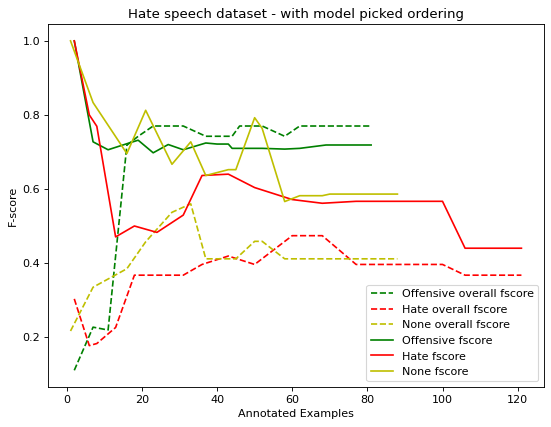

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df["offensive_count"], df["offensive_overall_fscore"],"g--", label="Offensive overall fscore")

plt.plot(df["hate_count"], df["hate_overall_fscore"], "r--", label="Hate overall fscore")

plt.plot(df["none_count"], df["none_overall_fscore"], "y--", label="None overall fscore")

plt.plot(df["offensive_count"], df["offensive_fscore"], "g-",label="Offensive fscore")

plt.plot(df["hate_count"], df["hate_fscore"],"r-", label="Hate fscore")


plt.plot(df["none_count"], df["none_fscore"], "y-", label="None fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset - with model picked ordering")
plt.legend()
plt.show()